Load libraries<br>
Initialize all variables.

In [2]:
from osgeo import gdal
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
import math

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

xAxis = 5000
yAxis = 5000
allLayers = np.zeros((yAxis,xAxis,13), dtype=int)

The 13 images are stored on the hard drive in the Data\ folder<br>
Read each image into memory. 

In [3]:
Image00 = gdal.Open(r"Data\B01.tif")
Image01 = gdal.Open(r"Data\B02.tif")
Image02 = gdal.Open(r"Data\B03.tif")
Image03 = gdal.Open(r"Data\B04.tif")
Image04 = gdal.Open(r"Data\B05.tif")
Image05 = gdal.Open(r"Data\B06.tif")
Image06 = gdal.Open(r"Data\B07.tif")
Image07 = gdal.Open(r"Data\B08.tif")
Image08 = gdal.Open(r"Data\B08a.tif")
Image09 = gdal.Open(r"Data\B09.tif")
Image10 = gdal.Open(r"Data\B10.tif")
Image11 = gdal.Open(r"Data\B11.tif")
Image12 = gdal.Open(r"Data\B12.tif")

The images have been narmalized in the SNAP product.<br>
The highest resolution image has a 10m resolution/pixel.<br>
The lower resolution images are stretched to match the highest resoluion images by the following factors.<br>
10m / 10m = 1 -- Bands 2, 3, 4 and 8<br>
20m / 10m = 2 -- Bands 5, 6, 7, 8a, 11, 12<br>
60m / 10m = 6 -- Bands 1, 9, 10<br><br>
The following table identifies the resolution of each band for Sentinel S2A.<br>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border:none;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;}
.tg .tg-2ouh{background-color:#9aff99;text-align:right;vertical-align:top}
.tg .tg-l0f3{background-color:#67fd9a;text-align:center;vertical-align:top}
.tg .tg-d78e{background-color:#9aff99;text-align:center;vertical-align:top}
.tg .tg-zdbk{font-weight:bold;background-color:#003532;color:#ffffff;text-align:center;vertical-align:top}
.tg .tg-94f7{background-color:#34ff34;text-align:right;vertical-align:top}
.tg .tg-otaw{background-color:#67fd9a;text-align:right;vertical-align:top}
.tg .tg-k3lo{background-color:#34ff34;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-zdbk">Spatial Resolution<br>(m)</th>
    <th class="tg-zdbk">Band Number</th>
    <th class="tg-zdbk">Central Wavelength<br>(nm)</th>
    <th class="tg-zdbk">Bandwidth<br>(nm)</th>
  </tr>
  <tr>
    <td class="tg-d78e">10</td>
    <td class="tg-d78e">2</td>
    <td class="tg-2ouh">496.6</td>
    <td class="tg-2ouh">98</td>
  </tr>
  <tr>
    <td class="tg-d78e">10</td>
    <td class="tg-d78e">3</td>
    <td class="tg-2ouh">560.0</td>
    <td class="tg-2ouh">45</td>
  </tr>
  <tr>
    <td class="tg-d78e">10</td>
    <td class="tg-d78e">4</td>
    <td class="tg-2ouh">664.5</td>
    <td class="tg-2ouh">38</td>
  </tr>
  <tr>
    <td class="tg-d78e">10</td>
    <td class="tg-d78e">8</td>
    <td class="tg-2ouh">835.1</td>
    <td class="tg-2ouh">145</td>
  </tr>
  <tr>
    <td class="tg-l0f3">20</td>
    <td class="tg-l0f3">5</td>
    <td class="tg-otaw">703.9</td>
    <td class="tg-otaw">19</td>
  </tr>
  <tr>
    <td class="tg-l0f3">20</td>
    <td class="tg-l0f3">6</td>
    <td class="tg-otaw">740.2</td>
    <td class="tg-otaw">18</td>
  </tr>
  <tr>
    <td class="tg-l0f3">20</td>
    <td class="tg-l0f3">7</td>
    <td class="tg-otaw">782.5</td>
    <td class="tg-otaw">28</td>
  </tr>
  <tr>
    <td class="tg-l0f3">20</td>
    <td class="tg-l0f3">8a</td>
    <td class="tg-otaw">864.8</td>
    <td class="tg-otaw">33</td>
  </tr>
  <tr>
    <td class="tg-l0f3">20</td>
    <td class="tg-l0f3">11</td>
    <td class="tg-otaw">1613.7</td>
    <td class="tg-otaw">143</td>
  </tr>
  <tr>
    <td class="tg-l0f3">20</td>
    <td class="tg-l0f3">12</td>
    <td class="tg-otaw">2202.4</td>
    <td class="tg-otaw">242</td>
  </tr>
  <tr>
    <td class="tg-k3lo">60</td>
    <td class="tg-k3lo">1</td>
    <td class="tg-94f7">443.9</td>
    <td class="tg-94f7">27</td>
  </tr>
  <tr>
    <td class="tg-k3lo">60</td>
    <td class="tg-k3lo">9</td>
    <td class="tg-94f7">945.0</td>
    <td class="tg-94f7">26</td>
  </tr>
  <tr>
    <td class="tg-k3lo">60</td>
    <td class="tg-k3lo">10</td>
    <td class="tg-94f7">1373.5</td>
    <td class="tg-94f7">75</td>
  </tr>
</table>

In [4]:
allLayers[:,:,0] = Image00.ReadAsArray()
allLayers[:,:,1] = Image01.ReadAsArray()
allLayers[:,:,2] = Image02.ReadAsArray()
allLayers[:,:,3] = Image03.ReadAsArray()
allLayers[:,:,4] = Image04.ReadAsArray()
allLayers[:,:,5] = Image05.ReadAsArray()
allLayers[:,:,6] = Image06.ReadAsArray()
allLayers[:,:,7] = Image07.ReadAsArray()
allLayers[:,:,8] = Image08.ReadAsArray()
allLayers[:,:,9] = Image09.ReadAsArray()
allLayers[:,:,10] = Image10.ReadAsArray()
allLayers[:,:,11] = Image11.ReadAsArray()
allLayers[:,:,12] = Image12.ReadAsArray()

<table>
  <tr>
    <th><img src="Data/Layers.png"></th>
    <th><left>The images are stored into a 3D array in memory where;<br>
    X-Y axis contains the pixels for each image and the Z-axis are the bands.</th>
  </tr>
</table>
Image processing is performed by doing the following:<br>
1. along the Z axis, read each pixel (13 of them) at (0,0)<br>
2. compare these pixels with a known rock signature<br>
3. store the result of correlation coefficient in an array<br>
4. repeat the process for each pixel<br><br>
The following two figures show the 13 pixel values for:<br>
i. The rock signature for {Control}<br>
ii. The pixle of interest {Sample}

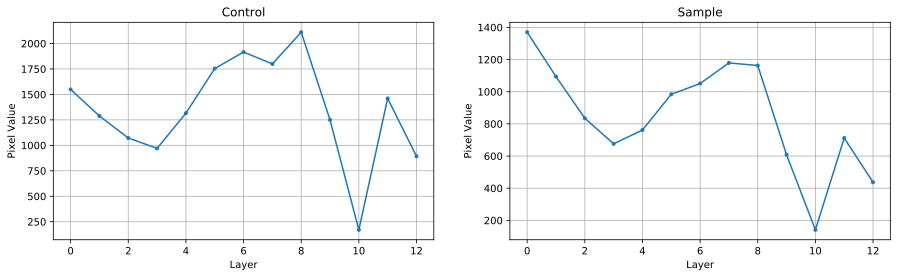

In [5]:
x1 = np.linspace(0, 12, 13)
x2 = np.linspace(0, 12, 13)

y1 = allLayers[0][0][:]
y2 = allLayers[1000][1000][:]

plt.rcParams['figure.figsize'] = (15,4)
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(x1, y1, '.-')
plt.title('Control')
plt.xlabel('Layer')
plt.ylabel('Pixel Value')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(x2, y2, '.-')
plt.title('Sample')
plt.xlabel('Layer')
plt.ylabel('Pixel Value')

plt.show()

In [6]:
test1 = np.zeros(13, dtype=int)
test = np.zeros(13, dtype=int)
result = np.zeros((xAxis,xAxis))
pltxAxis = np.arange(0, xAxis, 1)

test1 = allLayers[0][0][:]

for i in range(0, yAxis):
    for j in range(0, xAxis):
        test = allLayers[i][j][:]    
        if np.all(test == 0):
            result[i][j] = 0
        else:
            result[i][j] = abs(np.corrcoef(test1,test)[0,1])

The following is a cross section of one layer showing the correlation values for {Control} - {Sample}

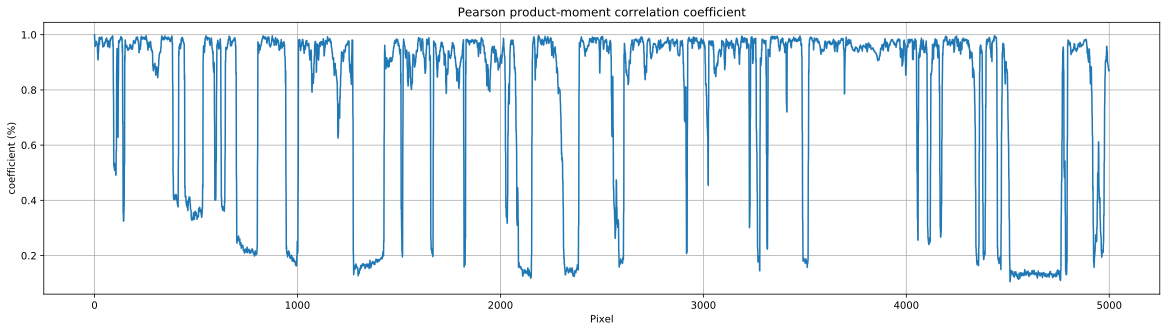

In [10]:
plt.rcParams['figure.figsize'] = (20,5)
fig, ax = plt.subplots()
ax.plot(pltxAxis, result[0])

ax.set(xlabel='Pixel', ylabel='coefficient (%)',
       title='Pearson product-moment correlation coefficient')
ax.grid()
plt.show()

The images show the original and the result.

In [11]:
#save the image
rescaled = (255.0 / result.max() * (result - result.min())).astype(np.uint8)
im = Image.fromarray(rescaled)
im.save('Data/correlation.png')

<img src="Data/POI1.png" width="200">
<img src="Data/correlation.png" width="200"><br>